<a href="https://colab.research.google.com/github/lynnkathomi/youth/blob/main/Road_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
from google.colab import files
uploaded = files.upload()

Saving accident.csv to accident.csv


In [3]:
df = pd.read_csv('accident.csv')


In [4]:
print(df.isnull().sum())
df = df.dropna()


Date                       3
Time                       3
Weather Condition          3
Road Surface               3
Light Condition            3
Vehicle Speed (km/h)       3
Traffic Control Present    3
Road Type                  3
Accident Severity          3
dtype: int64


In [5]:
df = pd.get_dummies(df, columns=['Weather Condition', 'Road Surface', 'Light Condition', 'Road Type'])


In [6]:
X = df.drop(columns=['Accident Severity'])
y = df['Accident Severity']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print(df.columns)


Index(['Vehicle Speed (km/h)', 'Traffic Control Present', 'Accident Severity',
       'Weather Condition_Clear', 'Weather Condition_Foggy',
       'Weather Condition_Rainy', 'Road Surface_Dry', 'Road Surface_Wet',
       'Light Condition_Daylight', 'Light Condition_Night with lights',
       'Road Type_Highway', 'Road Type_Local road', 'Road Type_Residential',
       'Year', 'Month', 'Day', 'Time_in_minutes'],
      dtype='object')


In [11]:
print(X.dtypes)


Date                                  object
Time                                  object
Vehicle Speed (km/h)                 float64
Traffic Control Present              float64
Weather Condition_Clear                 bool
Weather Condition_Foggy                 bool
Weather Condition_Rainy                 bool
Road Surface_Dry                        bool
Road Surface_Wet                        bool
Light Condition_Daylight                bool
Light Condition_Night with lights       bool
Road Type_Highway                       bool
Road Type_Local road                    bool
Road Type_Residential                   bool
dtype: object


In [12]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, handle errors

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop(columns=['Date'])


In [13]:
X = df.drop(columns=['Accident Severity'])  # Ensure this has no date or categorical columns left
y = df['Accident Severity']


In [16]:
print(df['Time'].head())


0    14:30
1    21:45
2     8:15
Name: Time, dtype: object


In [32]:
joblib.dump(model, 'accident_severity_model.pkl')
files.download('accident_severity_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.07389578993781454
Mean Squared Error (MSE): 0.005460587770533612
R-squared (R²): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


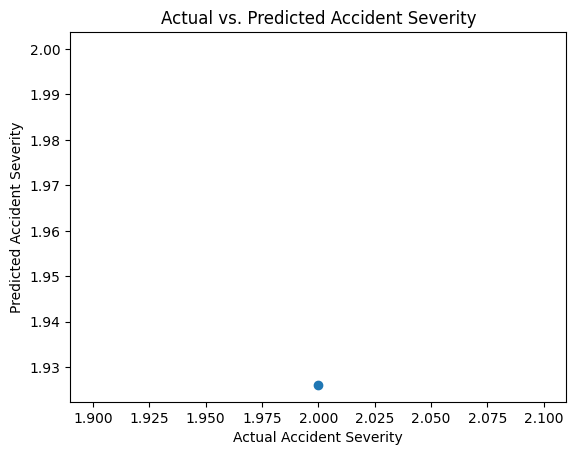

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Accident Severity")
plt.ylabel("Predicted Accident Severity")
plt.title("Actual vs. Predicted Accident Severity")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.show()


In [22]:
df.columns = df.columns.str.strip()


In [23]:
# Check if the 'Time' column is present after stripping spaces
if 'Time' in df.columns:
    # Convert 'Time' to datetime and then extract hours and minutes
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

    # Convert to total minutes since midnight
    df['Time_in_minutes'] = df['Time'].apply(lambda x: x.hour * 60 + x.minute)

    # Drop the original 'Time' column if not needed
    df = df.drop(columns=['Time'])
else:
    print("Column 'Time' not found in the DataFrame.")


Column 'Time' not found in the DataFrame.


In [26]:
print(X_train.dtypes)




Time                                  object
Vehicle Speed (km/h)                 float64
Traffic Control Present              float64
Weather Condition_Clear                 bool
Weather Condition_Foggy                 bool
Weather Condition_Rainy                 bool
Road Surface_Dry                        bool
Road Surface_Wet                        bool
Light Condition_Daylight                bool
Light Condition_Night with lights       bool
Road Type_Highway                       bool
Road Type_Local road                    bool
Road Type_Residential                   bool
Year                                   int32
Month                                  int32
Day                                    int32
dtype: object


In [27]:
# Assuming there's a column named 'Time' that is in 'hh:mm' format
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
    df['Time_in_minutes'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute
    df = df.drop(columns=['Time'])  # Drop the original if not needed


In [28]:
X = df.drop(columns=['Accident Severity'])  # Independent variables
y = df['Accident Severity']  # Dependent variable

# Ensure all features are numeric
print(X.dtypes)  # Check data types again


Vehicle Speed (km/h)                 float64
Traffic Control Present              float64
Weather Condition_Clear                 bool
Weather Condition_Foggy                 bool
Weather Condition_Rainy                 bool
Road Surface_Dry                        bool
Road Surface_Wet                        bool
Light Condition_Daylight                bool
Light Condition_Night with lights       bool
Road Type_Highway                       bool
Road Type_Local road                    bool
Road Type_Residential                   bool
Year                                   int32
Month                                  int32
Day                                    int32
Time_in_minutes                        int64
dtype: object


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Example of hypothetical input
hypothetical_data = pd.DataFrame({
    'Vehicle Speed (km/h)': [50],
    'Traffic Control Present': [1],
    'Weather Condition_Clear': [1],
    'Weather Condition_Foggy': [0],
    'Weather Condition_Rainy': [0],
    'Road Surface_Dry': [1],
    'Road Surface_Wet': [0],
    'Light Condition_Daylight': [1],
    'Light Condition_Night with lights': [0],
    'Road Type_Highway': [1],
    'Road Type_Local road': [0],
    'Road Type_Residential': [0],
    'Year': [2024],
    'Month': [10],
    'Day': [25],
    'Time_in_minutes': [120]  # e.g., 2 hours after midnight
})

# Make prediction
predicted_severity = model.predict(hypothetical_data)
print("Predicted Accident Severity:", predicted_severity)


Predicted Accident Severity: [0.07629198]


In [31]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.005460587770533612
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
